# Simulation for Library Acquisitions - printed books version.

In [1]:
import random
import numpy as np
import pandas as pd
import math

In [2]:
# Before getting total costs of books, to get labor costs for maintenance and cataloging.
# Accroding to ***, hourly labor cost can be calculated by annual wages, befefit rate, and paid bvacation hours.

def labor_costs(annual_work_hour):
    annual_wages = random.randint(50000, 70000)
    benefit_rate = random.uniform(0, 0.3)
    paid_off_hour = random.randint(0, 42)
    average_cost = (annual_wages + (annual_wages * benefit_rate)) / (annual_work_hour - paid_off_hour)
    return round(average_cost, 2)
labor_costs(1950)

35.55

In [3]:
## maintenance_cost can calculate from total_volume. 
def maintenance_cost(annual_work_hour, total_volume):
    maintenance_labor = labor_costs(annual_work_hour) * 0.04
    volumes_per_box = math.ceil(total_volume / 25)
    maintenance_cost = volumes_per_box * maintenance_labor
    return round(maintenance_cost, 2)
maintenance_cost(1950, 350000)

15355.2

In [4]:
# cataloging cost per book. Since we do not know how many book a library buy, we calculate cataloging labor cost per book. 
def cataloging_cost(annual_work_hour):
    day_cataloging = random.randint(8, 12)
    daily_labor = labor_costs(annual_work_hour) * 8
    cost_per_book = daily_labor / day_cataloging
    return round(cost_per_book, 2)
cataloging_cost(1950)

25.67

In [5]:
# get list of books including book price and thickness.
def get_book_list(num_of_titles, annual_work_hour):
    cost_per_book = cataloging_cost(annual_work_hour)
    pages = np.random.randint(10, 2000, size=num_of_titles)
    page_thickness = np.random.uniform(0.01, 0.05, size=num_of_titles)
    thickness = np.around(page_thickness * pages, decimals=2)
    page_price = np.random.uniform(0.01, 0.1, size=num_of_titles)
    price = np.around(page_price * pages, decimals=2)
    # Three types of demand indicates 3 is high, 2 medium, and 1 low.
    demand_list = ['1', '2', '3']
    demands = []
    for i in range(num_of_titles):
        demand = random.choice(demand_list)
        demands.append(demand)

    df = pd.DataFrame(data={'Thickness': thickness,
                            'Price': price,
                            'Demands': demands,
                            'cataloging_cost': cost_per_book})
    return df
plan = get_book_list(10000, 1950)
plan

,Thickness,Price,Demands,cataloging_cost
0,12.25,65.94,2,37.92
1,55.19,107.69,2,37.92
2,68.23,48.34,2,37.92
3,31.14,47.02,1,37.92
4,6.63,30.95,3,37.92
5,14.98,34.27,2,37.92
6,20.45,141.47,2,37.92
7,2.98,13.75,2,37.92
8,0.29,1.38,3,37.92
9,9.61,29.41,3,37.92


In [6]:
# vendor discount. We assume that vendor discount if a library purchase large volumes from them.
def vendor_discount(num_of_titles):
    if num_of_titles < 100:
        return 0.01
    elif 100 <= num_of_titles < 500:
        return 0.02
    elif num_of_titles >= 500:
        return 0.05

In [7]:
# Now we select from the list we created above.
# We consider both budget and thickness.
# We aggregate price and thickness separately, and we drop all nan value. 
# This is examples how it works.
plan = get_book_list(100, 1950)
budget = 1000 
space = 400
select_plan = plan.copy(deep=True)
select_plan['total_cost_per_book'] = select_plan['Price'] + select_plan['cataloging_cost']
print('This is total cost per book include book price itself and cataloging cost.\n\n', select_plan, '\n')
select_plan['cost_accumulate'] = select_plan['total_cost_per_book'].cumsum().where(lambda x: x <= budget)
print('Check price\n\n', select_plan)
select_plan['Total_thickness'] = select_plan['Thickness'].cumsum().where(lambda x:x <= space)
print('Check thickness\n\n', select_plan)
acquisitions = select_plan.dropna()
acquisitions

This is total cost per book include book price itself and cataloging cost.

     Thickness   Price Demands  cataloging_cost  total_cost_per_book
0       11.15   30.99       3             24.6                55.59
1       45.37  116.31       3             24.6               140.91
2       16.36   27.50       1             24.6                52.10
3       54.70  123.70       1             24.6               148.30
4       38.22   88.18       3             24.6               112.78
5       44.65   18.01       3             24.6                42.61
6       31.63   84.60       1             24.6               109.20
7       18.35   64.39       3             24.6                88.99
8       40.13  109.32       2             24.6               133.92
9        4.48   17.47       1             24.6                42.07
10      18.58  103.37       1             24.6               127.97
11      29.73   76.35       3             24.6               100.95
12      13.17   70.26       1          

,Thickness,Price,Demands,cataloging_cost,total_cost_per_book,cost_accumulate,Total_thickness
0,11.15,30.99,3,24.6,55.59,55.59,11.15
1,45.37,116.31,3,24.6,140.91,196.50,56.52
2,16.36,27.50,1,24.6,52.10,248.60,72.88
3,54.70,123.70,1,24.6,148.30,396.90,127.58
4,38.22,88.18,3,24.6,112.78,509.68,165.80
5,44.65,18.01,3,24.6,42.61,552.29,210.45
6,31.63,84.60,1,24.6,109.20,661.49,242.08
7,18.35,64.39,3,24.6,88.99,750.48,260.43
8,40.13,109.32,2,24.6,133.92,884.40,300.56
9,4.48,17.47,1,24.6,42.07,926.47,305.04


In [8]:
# From the above test, the code is re-written as a function. 
# return a dataFrame which is satisfied with both conditions (budget and thickness)

def select_book(plan, budget, space):
    select_plan = plan.copy(deep=True)
    select_plan['total_cost_per_book'] = select_plan['Price'] + select_plan['cataloging_cost']
    select_plan['cost_accumulate'] = select_plan['total_cost_per_book'].cumsum().where(lambda x: x <= budget)
    select_plan['Total_thickness'] = select_plan['Thickness'].cumsum().where(lambda x:x <= space)
    acquisitions = select_plan.dropna()
    return acquisitions

select_book(plan, 1000000, 1000)

,Thickness,Price,Demands,cataloging_cost,total_cost_per_book,cost_accumulate,Total_thickness
0,11.15,30.99,3,24.6,55.59,55.59,11.15
1,45.37,116.31,3,24.6,140.91,196.50,56.52
2,16.36,27.50,1,24.6,52.10,248.60,72.88
3,54.70,123.70,1,24.6,148.30,396.90,127.58
4,38.22,88.18,3,24.6,112.78,509.68,165.80
5,44.65,18.01,3,24.6,42.61,552.29,210.45
6,31.63,84.60,1,24.6,109.20,661.49,242.08
7,18.35,64.39,3,24.6,88.99,750.48,260.43
8,40.13,109.32,2,24.6,133.92,884.40,300.56
9,4.48,17.47,1,24.6,42.07,926.47,305.04


In [9]:
# The simulation has two strateges.
# One is buying books based on users' demands.
# Second is buying books 
def MonteCarloSimulation(annual_work_hour, total_volume, budget, space, num_of_titles):
    acquisition_budget = budget - maintenance_cost(annual_work_hour, total_volume)


    plan = get_book_list(num_of_titles, annual_work_hour)


    demand_order = plan.sort_values(by='Demands', ascending=False)
    price_order = plan.sort_values(by='Price', ascending=True)

    demand_acquisition = select_book(demand_order, acquisition_budget, space)
    price_acquisition = select_book(price_order, acquisition_budget, space)

    demand_book = demand_acquisition['Price'].count()
    demand_cost = round(demand_acquisition['total_cost_per_book'].sum() * (1 - vendor_discount(demand_book)), 2)
    demand_thickness = math.ceil(demand_acquisition['Thickness'].sum())

    price_book = price_acquisition['Price'].count()
    price_cost = round(price_acquisition['total_cost_per_book'].sum() * (1 - vendor_discount(price_book)), 2)
    price_thickness = math.ceil(price_acquisition['Thickness'].sum())

    sim_data = [demand_book, demand_cost, demand_thickness, price_book, price_cost, price_thickness]

    return sim_data
MonteCarloSimulation(1950, 50000, 1000000000, 10000, 100000)

[339, 28975.79, 9983, 4228, 133801.36, 9989]

In [10]:
# Simulation for 100 times and return Data Frame.
if __name__ == '__main__':


    datas = []
    for i in range(100):
        data = MonteCarloSimulation(1950, 50000, 1000000000, 10000, 100000)
        datas.append(data)
    simulation_result = pd.DataFrame(datas, columns=['num_of_books_by_demand',
                                                     'total_cost_by_demand',
                                                     'total_thickness_by_demand',
                                                     'num_of_books_by_price',
                                                     'total_cost_by_price',
                                                     'total_thickness_by_price'])
simulation_result

,num_of_books_by_demand,total_cost_by_demand,total_thickness_by_demand,num_of_books_by_price,total_cost_by_price,total_thickness_by_price
0,337,26724.70,9993,4295,115403.96,9996
1,333,26386.41,9998,4160,105263.31,10000
2,344,30083.45,9991,4182,143476.08,9996
3,348,31859.57,9992,4288,162128.50,9999
4,334,28327.53,9978,4203,152891.61,9999
5,327,32834.41,9979,4208,187046.62,9996
6,324,25219.02,9993,4275,103393.25,9998
7,343,29503.64,9995,4127,133676.04,9997
8,339,29554.37,9987,4193,148687.18,9997
9,328,27129.34,9922,4262,115054.99,9989


In [11]:
import matplotlib.pyplot as plt


a = simulation_result['total_cost_by_demand']
b = simulation_result['num_of_books_by_demand']
c = simulation_result['total_cost_by_price']
d = simulation_result['num_of_books_by_price']
e = simulation_result['total_thickness_by_demand']
f = simulation_result['total_thickness_by_price']

s = np.random.rand(*a.shape) * 1000 + 800

plt.title("Possible Number of Books and Total Costs by User Demand")
plt.scatter(a, b, s, c="g", alpha=0.5, marker=r'.',
            label="")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.show()

<Figure size 640x480 with 1 Axes>

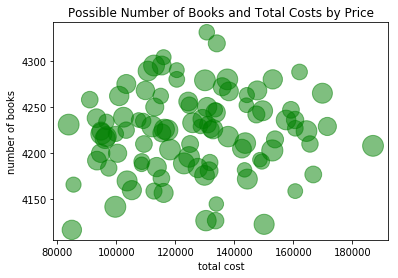

In [12]:
s = np.random.rand(*a.shape) * 1000 + 800

plt.title("Possible Number of Books and Total Costs by Price")
plt.scatter(c, d, s, c="g", alpha=0.5, marker=r'.',
            label="")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.show()

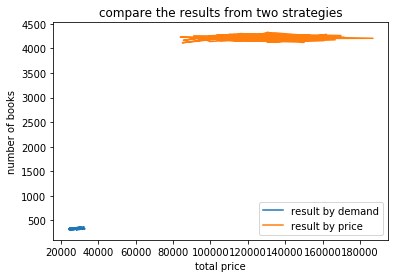

In [13]:
plt.plot(a, b, label='result by demand')
plt.plot(c, d, label='result by price')
plt.xlabel('total price')
plt.ylabel('number of books')

plt.title('compare the results from two strategies')

plt.legend()

plt.show()

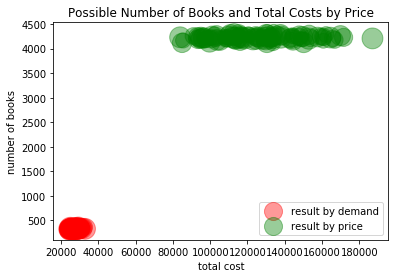

In [14]:
plt.title("Possible Number of Books and Total Costs by Price")
plt.scatter(a, b, s, c="r", alpha=0.4, marker = '.',
            label="result by demand")
plt.scatter(c, d, s, c="g", alpha=0.4, marker = '.',
            label="result by price")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.legend()

plt.show()

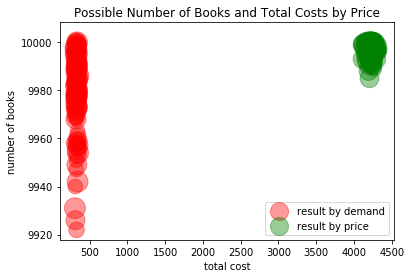

In [15]:
plt.title("Possible Number of Books and Total Costs by Price")
plt.scatter(b, e, s, c="r", alpha=0.4, marker = '.',
            label="result by demand")
plt.scatter(d, f, s, c="g", alpha=0.4, marker = '.',
            label="result by price")
plt.xlabel("total cost")
plt.ylabel("number of books")

plt.legend()

plt.show()